In [79]:
using PyPlot

In [2]:
h1(x1,x2)=[(2x1^3-4x1*x2+8) (-2x1^2+8x2+8)]' #∇f(x)
h2(x1,x2)=reshape([[6x1^2-4x2 -4x1] [-4x1 8]],(2,2)) # Hesse行列

h2 (generic function with 1 method)

In [3]:
h1(3,1) # 初期値(3,1)^T

2×1 Array{Int64,2}:
 50
 -2

In [4]:
h2(3,1)

2×2 Array{Int64,2}:
  50  -12
 -12    8

In [5]:
h2(3,1)^-1 * -h1(3,1)

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [83]:
x0 = [3 1]' # 初期値
a0 = 0.5 # ステップ幅

0.5

In [7]:
d0 = h2(3,1)^-1 * -h1(3,1) # ニュートン方程式に代入した結果

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [8]:
x1 = x0 + a0*d0

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [9]:
xk = [3 1]'
dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
x = xk + a0*dk

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [84]:
x_ims = []
y_ims = []
xk = [3 1]'
for i in 1:10
    dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
    x = xk + a0*dk
    xk = x
    push!(x_ims,x[1])
    push!(y_ims,x[2])
end

In [85]:
x_ims

10-element Array{Any,1}:
  2.26563   
  1.56371   
  0.831668  
 -0.00448438
 -0.769015  
 -1.08967   
 -1.23173   
 -1.29923   
 -1.33219   
 -1.34848   

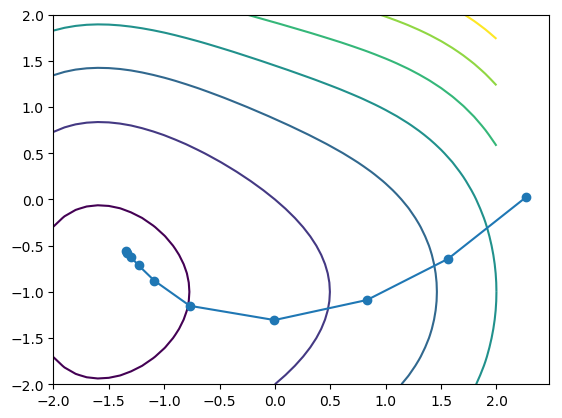

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1344cc828>

In [89]:
f(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4.*x2.^2 + 8x1 + 8x2
x1,x2 = (collect(-2:0.1:2),collect(-2:0.1:2))
x1_grid = repeat(x1',outer=(length(x2),1))
x2_grid = repeat(x2, outer=(1,length(x1)))
axes()[:contour](x1_grid,x2_grid,f(x1_grid,x2_grid))
axes()[:plot](x_ims,y_ims,marker="o")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAxv9tZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjc5NSBhYWE5YWE4IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAEDMZYiEABX//vfJ78Cm61tbtb+Tz0j8LLc+wio/blsTtOoAAAMAAAMABXKZDsLG8fA7TGAAAXwAEJKD+5dLKHgAKOI4iJf6ohJMO4ifKn32QlHkQcjwq09JilCXPJZQzrKeYKltpLC/LvuWxj+zmJYvVw7TihpzrzP/cpr0ESQ1li4s0KCXC2VZUh5bCaebOE8lDnvZstqzGhQt8vPK/BAmfbhXnQjmM8bWiTmLnh7lN76hTMD/FkcLp76X+C7sqdvmFIL8l72Ag9615v+WKO7guCGaclIlrLhpM/ZHMWxArxYnZNjLkprnN6kXz4JAt3VqUZOTmpTXix8MNs0uJjmplC4HZNuJG35EycNrGGZUnE45+YMMmg33oP6FyO0d6kirgGebyifOThAXPKOc1sWHx4ldPAX+U43JntaaJsm4C7+xz1NQdGVXfJ1eJGfs/od33LzBQRUASrB6pJ0LaPtUmlrA2EkB95GR7tNDv9seDzO2VAISljU575mNBe5Z8ByD4dnxHm2jWBlFm6t8qvrjRV+4X+jsrdi/wCfk5QAkFJ+M4D+PqxNfC3iaHCVWy4V/2QYQZ9kYiVoFDD6Rmbnr7UYq0deVEz3PqV7PwLV2ygd4au6X66cAuLBPd+qSISNL8XTiQ8iKEo3Fy/o4SeiG6QQ4/ivUYhJUTEkFwP3bGiCgBe1kh4uCuw5cH8bswGjaWBHEzLUjroEMnRlJxG4yE66ndwKzQrCFltQoJUiJT5WnU8v6ZT7Z7aOqCnIqGAHrBaBMSwKoswgE5E6Sadn9hH0L6973N5pisFwZKywIR2CG6MTqng+Qk9LQoYeCesWdxR70Ex+adUqrAdYCG9PDP0x2YgS5XA5mD3AVW/HUQCeJl8dRfHDcX8TGks6LQglLThejrvwZJAcrZg+SgPYkaeOAn7i+CT/1Tpg/rrc9xIxzzSdD2iM9curHGhKHZoo90CyBaDlO9HpqQ9Pgpoi2I+GqVFKp2HUCXVasj7o0gJ3L//MT++JaCb9zH5oQnx4JgxrimSd0EWOhNpyXZbTdY3McXe5XiZjZukFPM9lVx8oCpWhU1718NUuxmJKNI0CE7rZJadVQ9gHm2YHjYRRbvQeb5kSwtknWmqYXv9qSDmpEOich/0LtGLtW0+CvKRl6XIRo8X2hI9dnJ3icItGL++OwqG92U1Y4BBxdLd5s4C2K1m7P41Tegqm5rnmXE7nf4GTQl45Myftb6mIgKWhqPcBQKh30YGdP5xAVvtZs/MxICA/7Q37Pg99UReX/T3dFPXdGiK09CNocy9FgRLJxG5iyC8fKOqjngRd18ng+3PPTt5Ouuxsz/vKXlyUyZ2dpMVz4hUTtmOE6bnbaUtaj8EJS3r0BjCAgpFUIZhiXOoDgBAkk1FNBehhldAQCHS6r5nC2W90O1CYFqNP+WQcwjvupp3mv5tR3t9EucEP2otGU9CI3mbUqY+NBp5jo5QAVCzn96BbDMKB0bdf4+kYAd7/EehphLpylpZdf73A/9saf5vZU7jtM+F3cRQ3DdpiQwCPFsqNxs+bABfR1Dy9NnW869nL0MV1j3JdqzAeZ6ie4Jf+xmSW5kxbPYuSZOgJhhiAUJVfk8jGkjKUxQRGr6rkMiw3PLl9toA4HL3ziHaFsRQETOnWyG6vJ4u2DqQYdiDqcqW0eQZpEpBhzfolkAI6hy+SLu94S9w5hJ+eHyq3DaBoAK/U3Mt6NFvbhnwwrVH3Zw6n2QvNIYoJXkD0fP53fqFJXd3huBgEJUHgFnbnrtX25aYBqokKdX4F1dmyXhwvgjQMHxYP/lCmzW65YteT33yAyHhg0Bbp6eshbOXc8HmvlfKMwpAUmK+jmVx2DE4D4ngzm3PAB6Klvq81+IoHy5OCAEz/i61pEkpK/Cp6YNyGQ0Lwg+G9xM837HJ+BFxU0mE0o81PY1bOmdFWkHjspEW5arOnatBwzD0JQhrEtqjz3SGqFzm9Z7I/3LFtvekwKvipNuetmbJKUmJiv/1Yg4ikeSBZv8wzK5heFZVw0KwUaQ/xVYQo0w+tnJK3fXcHD0PbSggtcwYSoztNsEfG+zPMJy1MJPm3Z2dUerzbisZ9+IsYQiln//9P3nZL7G+H1+oJWP5EyoTmESmydvyfrvOmo1d9T/pjXhp54Ggh8WUdEFeci7AuIu3NfjzVwwAJ/DwHBDYf/5qNm5wJwYhdYYLiBzNYjW7WAnPvvG5JEu3TOH4+LxT9RXQSqlrLvvicxmrF2Uv7wJeNyHAjXOQMuFz1HeRJW7lIrhlIGtko91PR6jP86EGrhmHqBtr068RA8h+J+aaNz+8H4AERbLbECLTeel3TLjx4h3baYryGc8xwMB1PKiMFtYcn+5gVjkotojJxfcN0tk6YzHmOI05vbN6siw/w109F3QZHCD7ZTsJCKHZRvJaUnkc5BItQn4e9yVeUT8TTr1q7ea9z1RUtpEL6zGKh9gEMl6Bf1NPP2zh6sG6U5Y8pxVXIFWx7+S6AsQ6eQzdUrundm54r6X5DtlNbBEvHAKyP/YSTbzvLap2s7i+OYbsZM0RhWxAGfdZyhC4qqjrOrB/gLITqS8mcO5ES1sJmf9Jpz34cWLUnWWQajE4WCFrlSfhjEdXX+JfU/P8ZU7ZbAGVFoP5QypZBJ3mz2wxlDMN3RoSnuKj7kg/U5ySGaAVf8htWD3t+fY7ijMR2ObRxaq2cKHPN6sv0F5yMY05mGlIErkUcxfq/1nwBb6Lg2SpBW2g959oE+n70KMuKGC1qyt03seFdRuOEWoQQ8Bn++5uGm1l47bSzAx738MQtv30JX2CuYbKng73SXWg6suRX0z8q7SFUH5Mj9x10z3527L0AH3pftHSJhhetSbHYnjNS2CKSuz6hERnDqV69JHjNIzqJf/3D+XG5VhDi/5qOji2Pf4+/mZ7iT5++PmvfgnODvNSiHB/UqfhQ/m4oLti8zz72sw1WwQkK

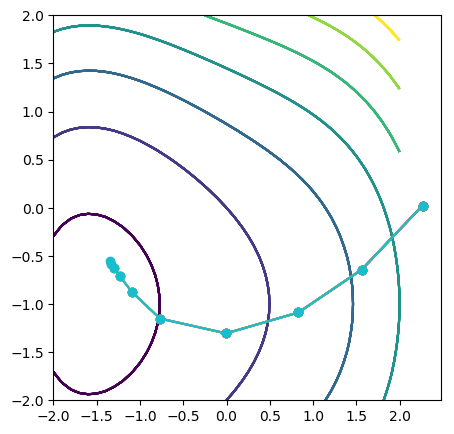

In [95]:
using PyCall
@pyimport matplotlib.animation as anim

# Define the init function, which draws the first frame (empty, in this case)
function init()
    global x_ims
    global y_ims
    global xk
    x_ims = []
    y_ims = []
    xk = [3 1]'
    return (x_ims,y_ims,xk,Union{})  # Union{} is the new word for None
end

# Animate draws the i-th frame, where i starts at i=0 as in Python.
function animate(i)
    global x_ims
    global y_ims
    global xk

    dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
    x = xk + a0*dk
    xk = x
    push!(x_ims,x[1])
    push!(y_ims,x[2])
    
    f(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4.*x2.^2 + 8x1 + 8x2
    x1,x2 = (collect(-2:0.1:2),collect(-2:0.1:2))
    x1_grid = repeat(x1',outer=(length(x2),1))
    x2_grid = repeat(x2, outer=(1,length(x1)))
    axes()[:contour](x1_grid,x2_grid,f(x1_grid,x2_grid))
    axes()[:plot](x_ims,y_ims,marker="o")
    return (x_ims,y_ims,xk,Union{})
end

fig = figure("MyFigure",figsize=(5,5))
# Create the animation object by calling the Python function FuncAnimaton
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=10, interval=500)

# Convert it to an MP4 movie file and saved on disk in this format.
myanim[:save]("test1.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
    
# Function for creating an embedded video given a filename
function html_video(filename)
    open(filename) do f
        base64_video = base64encode(f)
        """<video controls src="data:video/x-m4v;base64,$base64_video">"""
    end
end

# Display the movie in a Julia cell as follows. Note it has animation controls for the user.
display("text/html", html_video("test1.mp4"))